In [18]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)

import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [54]:
df = pd.read_csv('archive/acs2015_census_tract_data.csv')
df.columns

Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [56]:
import seaborn as sns

df = df.dropna()
# df = df[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
#        'Income']]
df = df[['TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'IncomePerCap',
       'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork']]
train_dataset = df.sample(frac=0.9, random_state=0)
test_dataset = df.drop(train_dataset.index)
# sns.pairplot(train_dataset[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
#        'Income']], diag_kind='kde')
# plt.show()
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('IncomePerCap')
test_labels = test_features.pop('IncomePerCap')

In [57]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.asarray(train_features).astype('float32'))

In [58]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Income]')
  plt.legend()
  plt.grid(True)


1/1 [==============================] - 0s 48ms/step
Epoch 1/200
1637/1637 - 2s - loss: 28507.4922 - val_loss: 28163.5410 - 2s/epoch - 1ms/step
Epoch 2/200
1637/1637 - 2s - loss: 28343.7188 - val_loss: 28000.1289 - 2s/epoch - 1ms/step
Epoch 3/200
1637/1637 - 2s - loss: 28179.9180 - val_loss: 27836.6738 - 2s/epoch - 1ms/step
Epoch 4/200
1637/1637 - 2s - loss: 28016.2305 - val_loss: 27673.2656 - 2s/epoch - 1ms/step
Epoch 5/200
1637/1637 - 2s - loss: 27852.4551 - val_loss: 27509.8848 - 2s/epoch - 1ms/step
Epoch 6/200
1637/1637 - 2s - loss: 27688.7695 - val_loss: 27346.5137 - 2s/epoch - 1ms/step
Epoch 7/200
1637/1637 - 2s - loss: 27525.0215 - val_loss: 27183.1406 - 2s/epoch - 1ms/step
Epoch 8/200
1637/1637 - 2s - loss: 27361.2812 - val_loss: 27019.7285 - 2s/epoch - 1ms/step
Epoch 9/200
1637/1637 - 2s - loss: 27197.5664 - val_loss: 26856.3145 - 2s/epoch - 2ms/step
Epoch 10/200
1637/1637 - 2s - loss: 27033.8770 - val_loss: 26692.9668 - 2s/epoch - 2ms/step
Epoch 11/200
1637/1637 - 2s - loss: 2

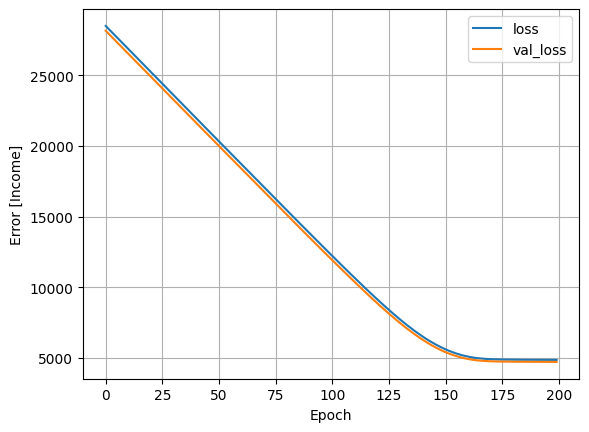

In [62]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.predict(train_features[:10])
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error',
)
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=200,
    # Suppress logging.
    verbose=2,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)
plot_loss(history)

In [43]:
test_results = {}
test_results['linear_model'] = linear_model.evaluate(test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [Income]']).T


,Mean absolute error [Income]
linear_model,8911.166992


In [46]:
# plt.plot(history.history['accuracy'])
# plt.show()

dict_keys(['loss', 'val_loss'])


In [52]:
print(linear_model.trainable_variables)

[<tf.Variable 'dense_13/kernel:0' shape=(28, 1) dtype=float32, numpy=
array([[  3469.846],
       [  8664.604],
       [ -1776.932],
       [ -1962.88 ],
       [  -961.773],
       [ -2450.737],
       [  -523.079],
       [  1371.247],
       [   230.043],
       [-11819.54 ],
       [ 18964.693],
       [  1427.263],
       [ -1948.31 ],
       [  -187.937],
       [ -1266.347],
       [ -1333.339],
       [  1433.979],
       [   -41.663],
       [ -2081.349],
       [ -1550.218],
       [ -1230.785],
       [  1355.054],
       [  4746.205],
       [  3691.934],
       [  -438.531],
       [  1322.843],
       [ -1842.094],
       [    43.915]], dtype=float32)>, <tf.Variable 'dense_13/bias:0' shape=(1,) dtype=float32, numpy=array([57307.35], dtype=float32)>]
